In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines

In [2]:
# flo: i dont think those are still up to date
gated_acc_entropy = 85.4
# gated_acc_margins = 85.6
# gated_acc_pmax = 85.6
# gated_acc_powentropy = 85.6

# cost_entropy = 0.51
# cost_margins = 0.505
# cost_pmax = 0.503
# cost_powentropy = 0.5045

# baseline_results_list_dict = [{'label':r' $h$', 'cost': cost_entropy, 'gated_acc':gated_acc_entropy, 'marker': 's', 'color': 'green', 'marker_label': r' $h$'},
#                                {'label':r' $p_{margins}$', 'cost': cost_margins, 'gated_acc':gated_acc_margins, 'marker': 's', 'color': 'green', 'marker_label': r' $p_{margins}$'},
#                                {'label':r' $p_{max}$', 'cost': cost_pmax, 'gated_acc':gated_acc_pmax, 'marker': 's', 'color': 'green', 'marker_label': r' $p_{max}$'},
#                                {'label':r' $h_{pow}$', 'cost': cost_powentropy, 'gated_acc':gated_acc_powentropy, 'marker': 's', 'color': 'green', 'marker_label': r' $h_{pow}$'}]
#                             #   {'label':r'init', 'cost': 1, 'gated_acc':90.47, 'marker': '+', 'color': 'yellow', 'marker_label': 'init'}]


In [3]:
# Boosted gradient https://arxiv.org/abs/2211.16726

# boosted_list_dict = []
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.148, 'gated_acc':45.18, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.1755, 'gated_acc':49.89, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.226, 'gated_acc':57.95, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.311, 'gated_acc':69.52, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.424, 'gated_acc':80.14, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.5129, 'gated_acc':85.32, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.6199, 'gated_acc':89.860, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.7026, 'gated_acc':92.45, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.7635, 'gated_acc':93.68, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.8120, 'gated_acc':94.38, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})
# boosted_list_dict.append({'label':r'boosted$', 'cost': 0.8385, 'gated_acc':94.64, 'marker': 'D', 'color':'c', 'marker_label': 'boosted'})

In [4]:
# code_list_dict = []
# code_list_dict.append({'label':r'code $\lambda=5$', 'cost': 0.32, 'gated_acc':51.408, 'marker': 'D', 'color':'b', 'marker_label': 'code'})
# code_list_dict.append({'label':r'code $\lambda=3$', 'cost': 0.57, 'gated_acc':80.30, 'marker': 'D', 'color':'b', 'marker_label': 'code'})
# code_list_dict.append({'label':r'code $\lambda=2$', 'cost': 0.69, 'gated_acc':90.01, 'marker': 'D', 'color':'b', 'marker_label': 'code'})
# code_list_dict.append({'label':r'code $\lambda=1$', 'cost': 0.71, 'gated_acc':91.63, 'marker': 'D', 'color':'b', 'marker_label': 'code'})
# code_list_dict.append({'label':r'code $\lambda=0.5$', 'cost': 0.71, 'gated_acc':91.83, 'marker': 'D', 'color':'b', 'marker_label': 'code'})
# code_list_dict.append({'label':r'code $\lambda=0.1$', 'cost': 0.71, 'gated_acc':91.60, 'marker': 'D', 'color':'b', 'marker_label': 'code'})
# code_list_dict.append({'label':r'code $\lambda=1$', 'cost': 0.71, 'gated_acc':91.71, 'marker': 'D', 'color':'b', 'marker_label': 'code'})


# default_list_dict = []
# default_list_dict.append({'label':r'default $\lambda=5$', 'cost': 0.14, 'gated_acc':37.77, 'marker': 'D', 'color':'r', 'marker_label': 'def'})
# default_list_dict.append({'label':r'default $\lambda=3$', 'cost': 0.14, 'gated_acc':37.25, 'marker': 'D', 'color':'r', 'marker_label': 'def'})
# default_list_dict.append({'label':r'default $\lambda=2$', 'cost': 0.57, 'gated_acc':81.21, 'marker': 'D', 'color':'r', 'marker_label': 'def'})
# default_list_dict.append({'label':r'default $\lambda=1$', 'cost': 0.70, 'gated_acc':90.25, 'marker': 'D', 'color':'r', 'marker_label': 'def'})
# default_list_dict.append({'label':r'default $\lambda=0.5$', 'cost': 0.72, 'gated_acc':92.31, 'marker': 'D', 'color':'r', 'marker_label': 'def'})
# default_list_dict.append({'label':r'default $\lambda=0.1$', 'cost': 0.72, 'gated_acc':91.87, 'marker': 'D', 'color':'r', 'marker_label': 'def'})
# default_list_dict.append({'label':r'default $\lambda=1$', 'cost': 0.86, 'gated_acc':94.8, 'marker': 'D', 'color':'r', 'marker_label': 'def'})

# def_list_dict = []

# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.86, 'gated_acc':94.71, 'marker': 'D', 'color':'k', 'marker_label': 'def'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.74, 'gated_acc':94.00, 'marker': 'D', 'color':'k', 'marker_label': 'def'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.67, 'gated_acc':91.95, 'marker': 'D', 'color':'k', 'marker_label': 'def'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.64, 'gated_acc':91.28, 'marker': 'D', 'color':'k', 'marker_label': 'def'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.54, 'gated_acc':82.67, 'marker': 'D', 'color':'k', 'marker_label': 'def'})

# uncer_list_dict = []


# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.80, 'gated_acc':91.69, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.74, 'gated_acc':94.04, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.70, 'gated_acc':93.42, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.66, 'gated_acc':92.25, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.61, 'gated_acc':88.69, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.50, 'gated_acc':75.34, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})
# def_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.39, 'gated_acc':59.24, 'marker': 'D', 'color':'r', 'marker_label': 'unc'})

# best_list_dict = []
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.78, 'gated_acc':92.59, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.74, 'gated_acc':93.94, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.71, 'gated_acc':93.12, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.66, 'gated_acc':91.98, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.60, 'gated_acc':87.52, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.48, 'gated_acc':71.09, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})
# best_list_dict.append({'label':r'ours $\lambda=1$', 'cost': 0.38, 'gated_acc':58.33, 'marker': 'D', 'color':'g', 'marker_label': 'unc'})

# single_point = []
# single_point.append({'label':r'ours trial', 'cost': 0.72, 'gated_acc':93, 'marker': 'D', 'color':'b', 'marker_label': 'unc'})



In [10]:
def create_list_to_plot(acc_cost_pairs, label,marker, color ,marker_label):
    list_to_plot = []
    for acc_cost_pair in acc_cost_pairs:
        acc = acc_cost_pair[0]
        cost = acc_cost_pair[1]
        ece = acc_cost_pair[2]
        dict_point = {'label':label, 'cost': cost, 'gated_acc':acc, 'gated_ece':ece, 'marker': marker, 'color':color, 'marker_label': marker_label}
        list_to_plot.append(dict_point)
    return list_to_plot

In [31]:
our_acc_pairs = [  [72.1,42,12.8],[81.5,48.6,11.1],[89.5, 58,7.3], [91.68,62.8,5.5], [93.1,69.5,3.6]]
label = 'Ours. Approach 1, single ratio'
marker_label = 'Ours. Approach 1, single ratio'
color = 'r'
marker = '.'
our_results = create_list_to_plot(our_acc_pairs, label,marker, color ,marker_label)

In [32]:
boosted_acc_pairs = [
# [0.390*100.0, 14.82, 26.73, 3.9] ,
# [0.401*100.0, 15.56, 27.84] ,
# [0.415*100.0, 16.46, 29.07] ,
# [0.431*100.0, 17.55, 30.57] ,
# [0.451*100.0, 18.88, 32.39] ,
# [0.475*100.0, 20.39, 34.59] ,
# [0.508*100.0, 22.58, 37.55] ,
# [0.537*100.0, 24.75, 40.07] ,
[0.577*100.0, 27.41, 43.57] ,
[0.616*100.0, 30.11, 46.87] ,
[0.653*100.0, 33.00, 50.01] ,
[0.686*100.0, 35.85, 52.69] ,
[0.716*100.0, 38.55, 55.19] ,
# [0.745*100.0, 41.16, 57.49] ,
[0.772*100.0, 44.24, 59.68] ,
[0.797*100.0, 46.92, 61.61] ,
[0.818*100.0, 49.52, 63.22] ,
# [0.835*100.0, 51.85, 64.55] ,
[0.853*100.0, 54.39, 65.89] ,
# [0.867*100.0, 56.67, 66.94] ,
[0.881*100.0, 58.74, 67.99] ,
[0.891*100.0, 60.57, 68.73] ,
[0.901*100.0, 62.36, 69.39] ,
[0.907*100.0, 63.78, 69.84] ,
[0.914*100.0, 65.12, 70.33] ,
# [0.919*100.0, 66.50, 70.69] ,
[0.923*100.0, 67.53, 70.93] ,
[0.927*100.0, 68.55, 71.22] ,
# [0.930*100.0, 69.48, 71.40] ,
[0.931*100.0, 70.21, 71.50] ,
[0.934*100.0, 71.00, 71.66] ,
# [0.935*100.0, 71.71, 71.75] ,
[0.937*100.0, 72.35, 71.82] ,
[0.939*100.0, 73.04, 71.94] ,
# [0.940*100.0, 73.54, 72.03] ,
[0.941*100.0, 74.01, 72.08] ,
# [0.942*100.0, 74.57, 72.17] ,
[0.943*100.0, 74.90, 72.19] ,
[0.943*100.0, 75.25, 72.21]]
label = 'boosted'
marker_label = 'boosted'
color = 'c'
marker = '.'
boosted_list_dict = create_list_to_plot(boosted_acc_pairs, label,marker, color ,marker_label)

In [33]:
weight_per_gate_acc_pairs = [[55, 25, 12],[67, 33, 12],[70, 37, 13]]
label = 'Ours. Approach 3, one ratio per task'
marker_label = 'Ours. Approach 3, one ratio per task'
color = 'k'
marker = '.'
our_wresults = create_list_to_plot(weight_per_gate_acc_pairs, label,marker, color ,marker_label)

In [43]:
app2 = [[73.6, 45.7, 11.6], [88.1, 59.3, 8.0], [40.2, 14.3, 11.2], [92, 66.8, 5.2]]
label = 'Ours. Approach 2, ignore'
marker_label = 'Ours. Approach 2, ignore'
color = 'g'
marker = '.'
our_2results = create_list_to_plot(app2, label,marker, color ,marker_label)

In [48]:
app4 = []
label = 'Ours. Approach 4, val'
marker_label = 'Ours. Approach 4, val'
color = 'b'
marker = '.'
our_4results = create_list_to_plot(app4, label,marker, color ,marker_label)

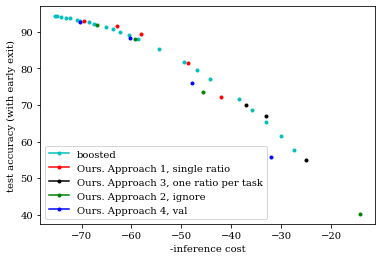

In [49]:
font = {'family' : 'serif',
        'size'   : 10}

combined_dicts = boosted_list_dict+our_results+our_wresults+our_2results+our_4results
matplotlib.rc('font', **font)

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_acc = dict_of_result['gated_acc']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(-cost, gated_acc, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('-inference cost')
ax.set_ylabel('test accuracy (with early exit)')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('perf_cost_app1vs3.pdf')

In [45]:
plt.close()

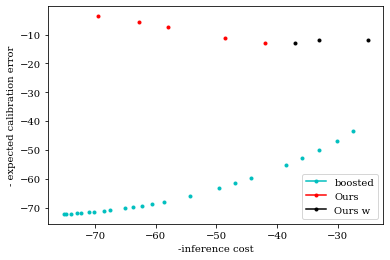

In [29]:

fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    cost = dict_of_result['cost']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(-cost, -gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('-inference cost')
ax.set_ylabel('- expected calibration error')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('ece_cost.pdf')

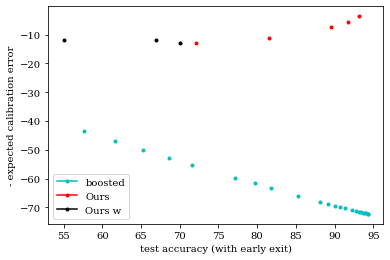

In [30]:

matplotlib.rc('font', **font)
fig = plt.figure()
ax = plt.subplot(111)
legend_patches_dict = {}
for dict_of_result in combined_dicts:
    label = dict_of_result['label']
    marker_label = dict_of_result['marker_label']
    gated_acc = dict_of_result['gated_acc']
    marker = dict_of_result['marker']
    gated_ece = dict_of_result['gated_ece']
    if not marker_label in legend_patches_dict.keys():
        legend_patches_dict[marker_label] = {'color': dict_of_result['color'], 'marker': marker}
    ax.plot(gated_acc, -gated_ece, marker, color=dict_of_result['color'])
# fig.xlabel('- inference cost')
patches = []
for patch in legend_patches_dict.keys():
    patches.append(mlines.Line2D([], [], color=legend_patches_dict[patch]['color'], marker = legend_patches_dict[patch]['marker'], label=patch))
ax.legend(handles=patches)
ax.set_xlabel('test accuracy (with early exit)')
ax.set_ylabel('- expected calibration error')
# ax.legend(bbox_to_anchor=(1.1, 1.05, 0.5, 0.2))
ax.set_in_layout(in_layout=True)

plt.savefig('acc_ece.pdf')